In [1]:
#Install seaborn

!pip install seaborn

In [2]:
#Import Libraries and set visual style for plots

#Data Manipulation/Analysis 
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#Datetime
from datetime import datetime

#Visuzalization styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

#Display settings
pd.set_option('display.max_columns', None)

In [ ]:
#Load the data
file_name = 'spreads.csv'
data = pd.read_csv(file_name)

#Show the first rows
print("First rows of the dataset:")
data.head()

First rows of the dataset:


,quote_hour,symbol,avg_spread
0,2/12/2024 0:00,US30,4.8
1,2/12/2024 1:00,US30,4.8
2,2/12/2024 2:00,US30,4.8
3,2/12/2024 3:00,US30,4.8
4,2/12/2024 4:00,US30,4.8


In [4]:
#Inspect the dataset
print("Dataset info:")
print(data.info())

print("\nDescriptive Statistics:")
print(data.describe())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   quote_hour  480 non-null    object 
 1   symbol      480 non-null    object 
 2   avg_spread  478 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.4+ KB
None

Descriptive Statistics:
       avg_spread
count  478.000000
mean     2.503022
std      1.562911
min      0.993543
25%      1.150000
50%      1.670000
75%      3.780000
max      9.770000


In [5]:
#In the event the file was not sorted, sort and then verify we have the data as needed(structure and content)
data['quote_hour'] = pd.to_datetime(data['quote_hour'], errors='coerce')

full_range = pd.date_range(start=data['quote_hour'].min(), end=data['quote_hour'].max(), freq='h')
full_data = pd.DataFrame({'quote_hour': full_range}) 

data = pd.merge(full_data, data, on='quote_hour', how='inner')  

#Verify the dataset
print("Dataset with only existing values:")
print(data.info())  
print(data.head())  


Dataset with only existing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   quote_hour  480 non-null    datetime64[ns]
 1   symbol      480 non-null    object        
 2   avg_spread  478 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.4+ KB
None
           quote_hour   symbol  avg_spread
0 2024-02-12 00:00:00     US30        4.80
1 2024-02-12 00:00:00  USD/JPY        1.27
2 2024-02-12 01:00:00     US30        4.80
3 2024-02-12 01:00:00  USD/JPY        1.31
4 2024-02-12 02:00:00     US30        4.80


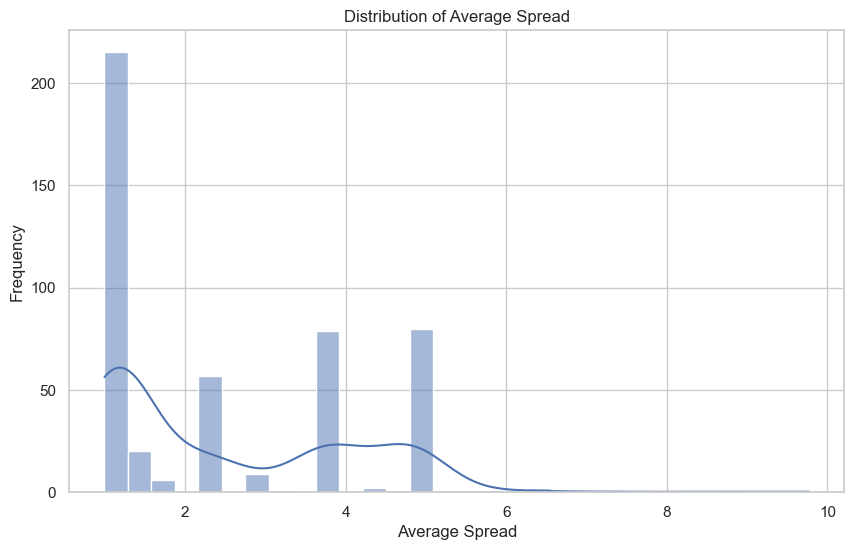

In [6]:
#Analyzis and distribution of avg_spread

plt.figure(figsize=(10, 6))
sns.histplot(data['avg_spread'], kde=True, bins=30)
plt.title('Distribution of Average Spread')
plt.xlabel('Average Spread')
plt.ylabel('Frequency')
plt.show()


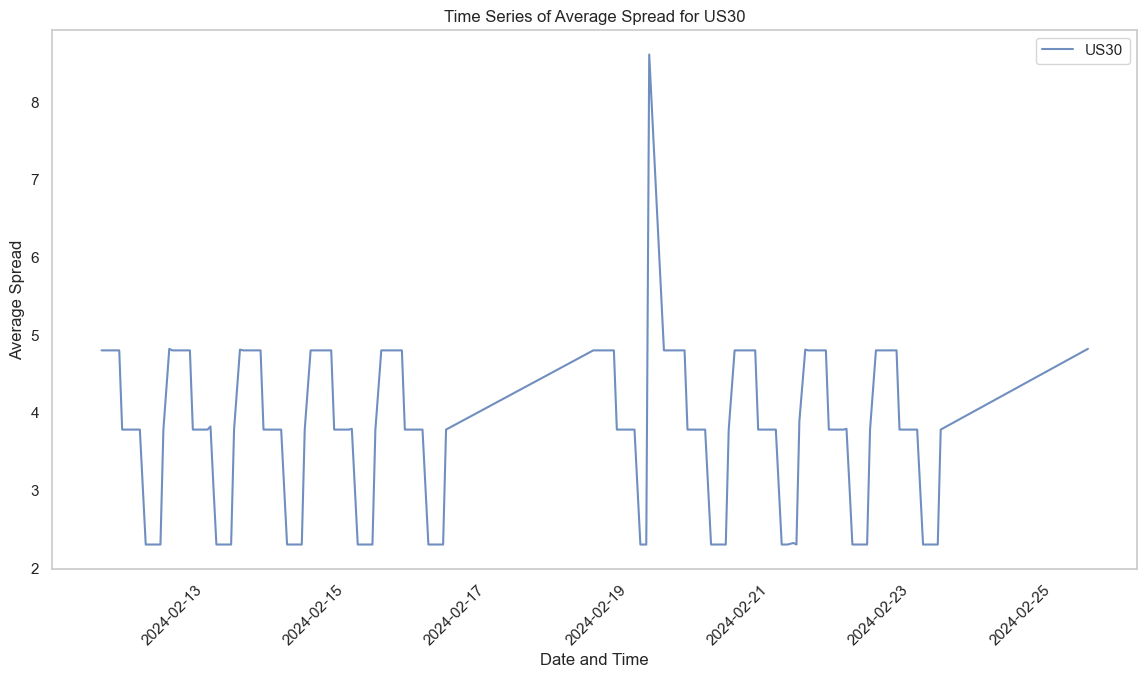

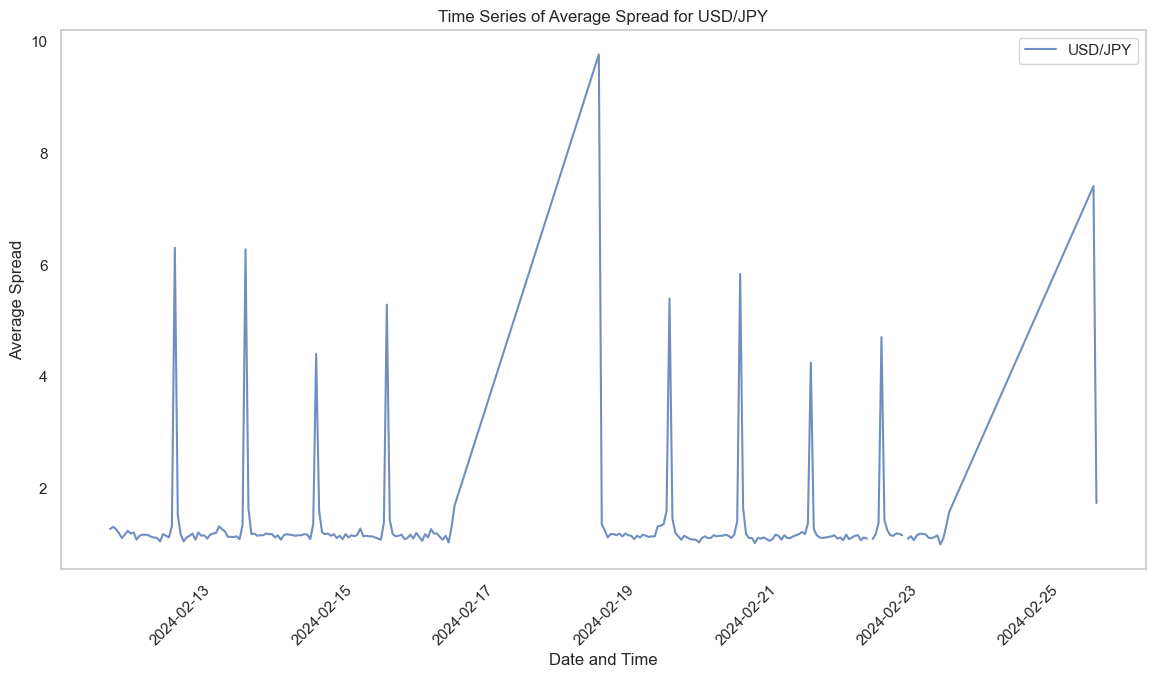

In [9]:
#Time series analysis 

symbols = data['symbol'].unique()

for symbol in symbols:
    plt.figure(figsize=(14, 7))
    symbol_data = data[(data['symbol'] == symbol)]
    plt.plot(symbol_data['quote_hour'], symbol_data['avg_spread'], label=symbol, alpha=0.8)
    plt.title(f'Time Series of Average Spread for {symbol}')
    plt.xlabel('Date and Time')
    plt.ylabel('Average Spread')
    plt.xticks(rotation=45)  
    plt.legend()
    plt.grid()
    plt.show()


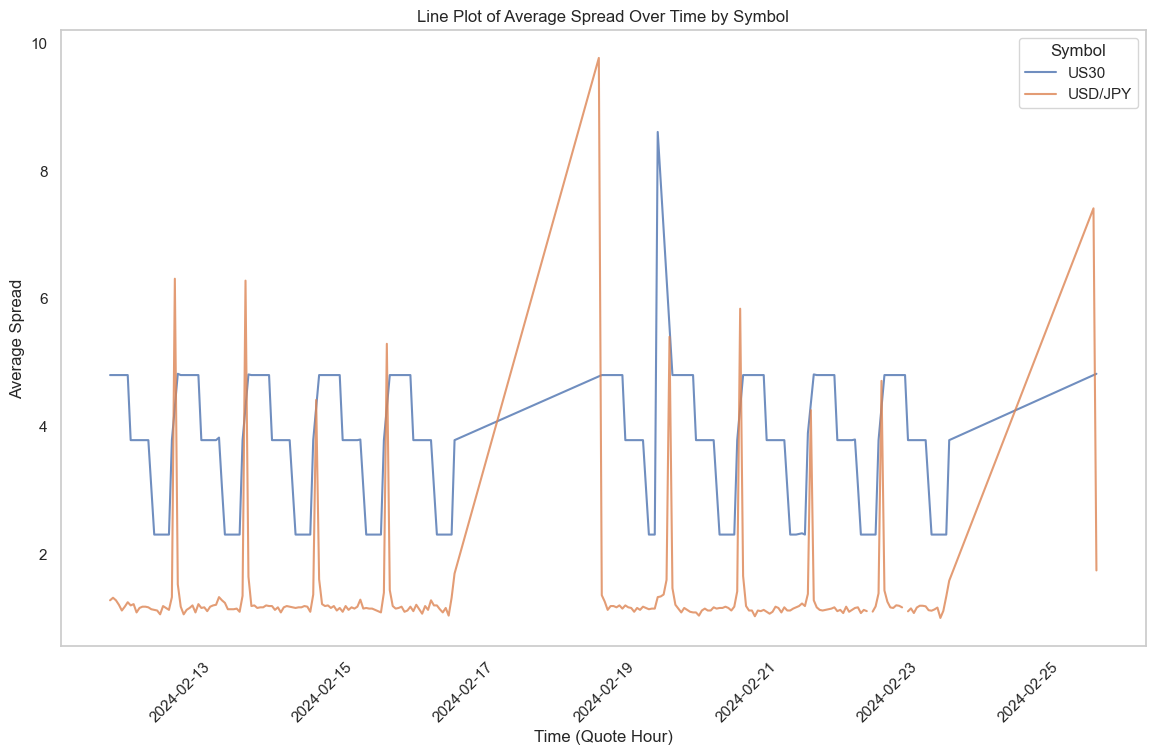

In [16]:
#avg_spread over time by symbol
plt.figure(figsize=(14, 8))

symbols = data['symbol'].unique()
for symbol in symbols:
    symbol_data = data[data['symbol'] == symbol]
    plt.plot(symbol_data['quote_hour'], symbol_data['avg_spread'], label=symbol, alpha=0.8)

plt.title('Line Plot of Average Spread Over Time by Symbol')
plt.xlabel('Time (Quote Hour)')
plt.ylabel('Average Spread')
plt.legend(title='Symbol')
plt.grid()
plt.xticks(rotation=45) 
plt.show()


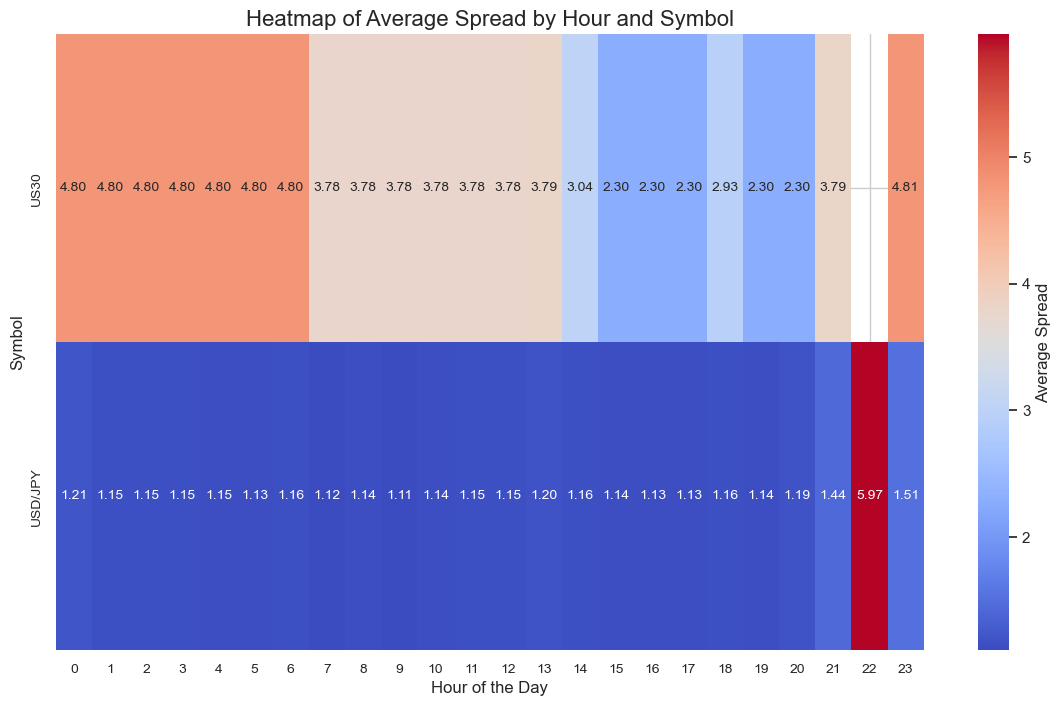

In [21]:
#hourly trends 

plt.figure(figsize=(14, 8))

sns.heatmap(
    hourly_avg,
    annot=True,                
    fmt=".2f",                 
    cmap="coolwarm",             
    cbar_kws={'label': 'Average Spread'},  
    annot_kws={"size": 10}     
)

plt.title('Heatmap of Average Spread by Hour and Symbol', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Symbol', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



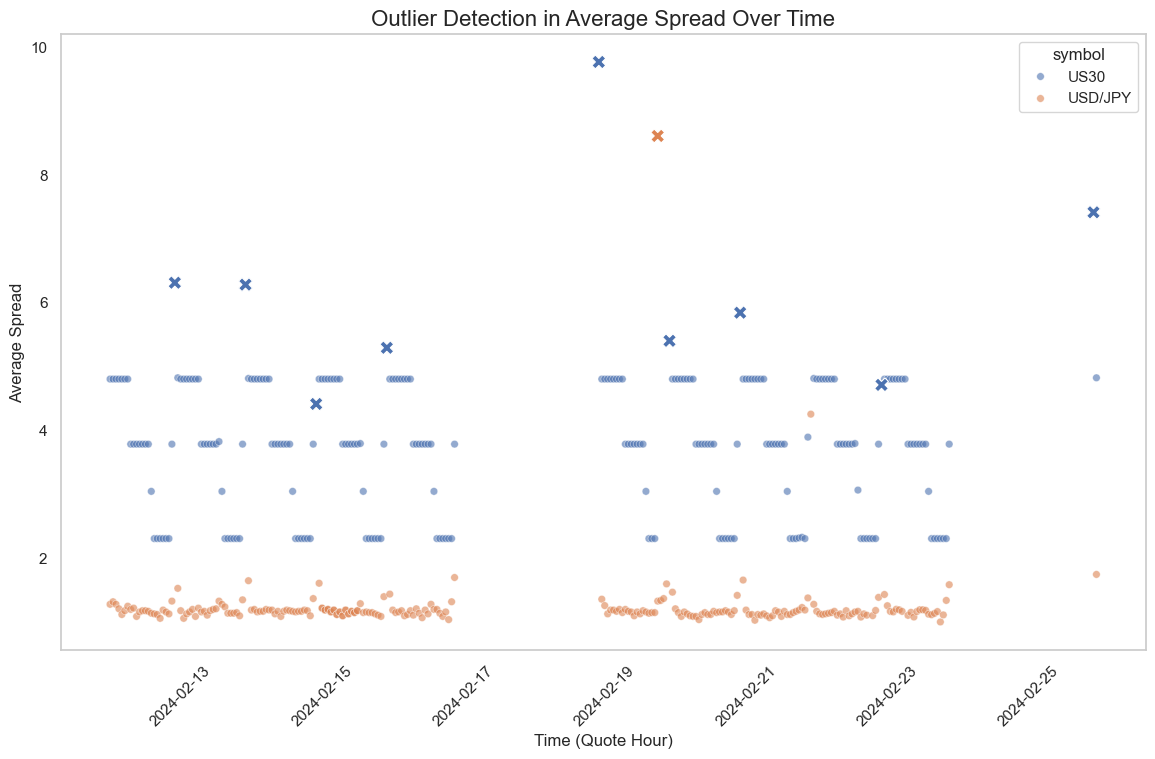

In [23]:
#Outlier detection
plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=data[~data['is_outlier']], 
    x='quote_hour',
    y='avg_spread',
    hue='symbol',
    alpha=0.6,
    s=30,  
    legend="brief"  
)


sns.scatterplot(
    data=data[data['is_outlier']],  
    x='quote_hour',
    y='avg_spread',
    hue='symbol',
    marker='X',  
    s=100,  
    legend=False  
)

plt.title('Outlier Detection in Average Spread Over Time', fontsize=16)
plt.xlabel('Time (Quote Hour)', fontsize=12)
plt.ylabel('Average Spread', fontsize=12)
plt.grid()
plt.xticks(rotation=45)
plt.show()


## Key Findings from Exploratory Data Analysis

### 1. Distribution of `avg_spread`
- The distribution of `avg_spread` reveals:
  - **US30** has higher average spread values compared to **USD/JPY**.
  - **US30** shows a wider range of spread variability, with values clustering at both high and low ends.
  - **USD/JPY** has more tightly clustered spreads, with fewer extreme values.

### 2. Time Series Trends
- **General Trends**:
  - Spreads for both symbols exhibit periodic fluctuations over time.
  - Specific periods, such as early hours and late evenings, show significant variability.

- **Symbol-Specific Trends**:
  - **US30** shows spikes in spread values during certain hours, possibly aligning with high market activity.
  - **USD/JPY** has a relatively stable pattern, with occasional anomalies.

### 3. Hourly Trends
- The hourly heatmap revealed:
  - Higher spreads for **US30** during specific hours (e.g., early mornings and late afternoons).
  - **USD/JPY** remains more consistent across hours but shows slightly increased spreads during specific time windows.

### 4. Outliers
- Using Z-scores, we detected significant anomalies in `avg_spread`:
  - Outliers were identified across both symbols, with some exceeding thresholds by several standard deviations.
  - Most outliers occur during periods of high volatility, likely influenced by external market events.

### 5. Missing Timestamps
- No critical data gaps were found after preprocessing, ensuring analysis integrity.
- Any previously missing timestamps were filled, preserving chronological order without introducing placeholders.

---

## Summary Insights
- **`US30` exhibits higher volatility**:
  - Greater variability and frequent spikes in `avg_spread` compared to `USD/JPY`.
- **Outliers and anomalies align with market activity**:
  - Most anomalies occur during high-volatility periods, which can be tied to market open/close or macroeconomic events.
- **Hourly patterns indicate actionable insights**:
  - Certain time windows consistently show increased spread, which can inform alert thresholds.


## Recommendations for Alerts

### 1. Threshold-Based Alerts
- **Outlier Detection**:
  - Calculate Z-scores for `avg_spread` values:
    - Trigger an alert if `|Z| > 3` (i.e., the spread deviates more than 3 standard deviations from the mean).
  - Recommended thresholds (based on analysis):
    - For **US30**: 
      - Upper limit: `mean + 2 * std`
      - Lower limit: `mean - 2 * std`
    - For **USD/JPY**:
      - Upper limit: `mean + 2 * std`
      - Lower limit: `mean - 2 * std`
  - These thresholds capture significant deviations while accounting for natural variability.

### 2. Time-Based Monitoring
- **Hourly Monitoring**:
  - Focus on high-variability periods identified in the hourly heatmap:
    - For **US30**, monitor early mornings and late afternoons.
    - For **USD/JPY**, monitor slight peaks during specific time windows.
  - Use these time windows to implement more granular checks or conditional alerts.

### 3. Anomaly Detection Workflow
- **Proposed Workflow**:
  1. Input real-time `avg_spread` data.
  2. Compare against predefined thresholds (based on Z-scores or statistical limits).
  3. Flag and log anomalies for further investigation.
  4. Optionally, notify stakeholders via email or dashboard.

### 4. Visual Monitoring
- Create real-time visual dashboards:
  - Line charts with flagged anomalies.
  - Hourly trend comparisons for spread variability.

### 5. Future Considerations
- **Dynamic Thresholds**:
  - Consider implementing dynamic thresholds that adapt to market conditions (e.g., using rolling mean and standard deviation).
- **Correlation Analysis**:
  - Explore correlations with external factors (e.g., trading volume, market events) to enhance alert accuracy.
